In [3]:
import diff_classifier.aws as aws
import diff_classifier.utils as ut
import diff_classifier.msd as msd
import diff_classifier.features as ft
import diff_classifier.imagej as ij
import diff_classifier.heatmaps as hm
import diff_classifier.heatmaps_MM_adjust as hm_mm
import os
import os.path as op
import numpy as np
import numpy.ma as ma
import scipy.stats as stats
import pandas as pd
import skimage.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

# Loading and checking a video

In [ ]:
test_image = sio.imread('{}_1_1.tif'.format(prefix))

In [ ]:
#aws.download_s3('{}/{}.tif'.format(remote_folder, prefix), '{}.tif'.format(prefix))

fig, ax = plt.subplots(figsize=(14, 14))
full_image = sio.imread('{}.tif'.format(prefix))
ax.imshow(full_image[300, :, :], cmap='gray', vmin=60, vmax=500)
ax.axis('off')

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 10))
# ax.imshow(test_image[650, :, :], cmap='gray', vmin=60, vmax=300)

In [ ]:
# fig, ax = plt.subplots(figsize=(10, 10))
# ax.imshow(test_image[0, :, :], cmap='gray', vmin=60, vmax=300)

# Splitting images before analysis

In [40]:
prefix = '60nm_PS_PEG_hippocampus_vid_1_1'
#remote_folder = "01_18_Experiment/{}".format(prefix.split('_')[0])
local_folder = '/Volumes/McKenna_Mac_Partition/Confocal_Data/MPT/5_8_18_mGluR5_HET_60nm_PS_PEG/section_1'
ires = 511
frames = 650
filename = '{}.tif'.format(prefix)
#remote_name = op.join(remote_folder, filename)
local_name = op.join(local_folder, filename)
#s3 = boto3.client('s3')

In [ ]:
os.getcwd()

In [ ]:
#aws.download_s3(remote_name, local_name)
names = ij.partition_im(local_name)
for name in names:
    #aws.upload_s3(name, op.join(remote_folder, name))
    print("Done with splitting.  Should output file of name {}".format(local_folder+'/'+name))

In [41]:
names = []
for i in range(0, 4):
    for j in range(0, 4):
        names.append('{}_{}_{}.tif'.format(prefix, i, j))

In [ ]:
#delete when done: only using to run plotting on a single of the 16 crops
names = prefix+'_0_0.tif'

# Particle Tracking

Pause here to demonstrate tracking with the Trackmate GUI.  Show the Trackmate template file.

In [ ]:
#ij.track?

In [ ]:
# outfile = 'Traj_' + names[15].split('.')[0] + '.csv'
# row = int(names[15].split('.')[0].split('_')[4])
# local_im = op.join(local_folder, names[15])
# row=3

# test_intensity = ij.mean_intensity(local_im)
# if test_intensity > 500:
#     quality = 245
# else:
#     quality = 4.5
    
# if row==3:
#     y = 500
# else:
#     y = 511

# ij.track(local_im, outfile, template=None, fiji_bin=None, radius=4.5, threshold=0., 
#       do_median_filtering=True, quality=quality, x=511, y=y, ylo=1, median_intensity=300.0, snr=0.0, 
#       linking_max_distance=8.0, gap_closing_max_distance=10.0, max_frame_gap=2,
#       track_displacement=10.0)

In [42]:
print(names)

['60nm_PS_PEG_hippocampus_vid_1_1_0_0.tif', '60nm_PS_PEG_hippocampus_vid_1_1_0_1.tif', '60nm_PS_PEG_hippocampus_vid_1_1_0_2.tif', '60nm_PS_PEG_hippocampus_vid_1_1_0_3.tif', '60nm_PS_PEG_hippocampus_vid_1_1_1_0.tif', '60nm_PS_PEG_hippocampus_vid_1_1_1_1.tif', '60nm_PS_PEG_hippocampus_vid_1_1_1_2.tif', '60nm_PS_PEG_hippocampus_vid_1_1_1_3.tif', '60nm_PS_PEG_hippocampus_vid_1_1_2_0.tif', '60nm_PS_PEG_hippocampus_vid_1_1_2_1.tif', '60nm_PS_PEG_hippocampus_vid_1_1_2_2.tif', '60nm_PS_PEG_hippocampus_vid_1_1_2_3.tif', '60nm_PS_PEG_hippocampus_vid_1_1_3_0.tif', '60nm_PS_PEG_hippocampus_vid_1_1_3_1.tif', '60nm_PS_PEG_hippocampus_vid_1_1_3_2.tif', '60nm_PS_PEG_hippocampus_vid_1_1_3_3.tif']


In [39]:
names[0].split('.')[0].split('_')

['60nm', 'PS', 'PEG', 'hippocampus', 'vid', '1', '1', '0', '0']

In [14]:
print(names[0].split('.')[0])

60nm_PS_PEG_cortex_vid_1_1_0_0


In [23]:
for name in names:
    outfile = 'Traj_' + name.split('.')[0] + '.csv'
    local_im = op.join(local_folder, name)
    
    row = int(name.split('.')[0].split('_')[7])
    col = int(name.split('.')[0].split('_')[8])

#     try:
#         aws.download_s3(remote_folder+'/'+outfile, outfile)
#     except:
    test_intensity = ij.mean_intensity(local_im)
    quality = 2.81
        
    if row==3:
        y = 485
    else:
        y = 510

    ij.track(local_im, outfile, template=None, radius=3.5, threshold=0., 
          do_median_filtering=True, quality=quality, x=511, y=y, ylo=1, median_intensity=300.0, snr=0.0, 
          linking_max_distance=10.0, gap_closing_max_distance=8.0, max_frame_gap=2,
          track_displacement=10.0)

    # aws.upload_s3(outfile, remote_folder+'/'+outfile)
    print("Done with tracking.  Should output file of name {}".format(local_folder+'/'+outfile))

/Applications/Fiji.app/Contents/MacOS/ImageJ-macosx --ij2 --headless --run /var/folders/bq/82bsdg792tz2kq2c1b32j7zm0000gn/T/tmprb5xd0jq.py
Done with tracking.  Should output file of name /Volumes/McKenna_Mac_Partition/Confocal_Data/MPT/5_8_18_mGluR5_HET_60nm_PS_PEG/section_1//Traj_60nm_PS_PEG_thalamus_vid_1_5_0_0.csv
/Applications/Fiji.app/Contents/MacOS/ImageJ-macosx --ij2 --headless --run /var/folders/bq/82bsdg792tz2kq2c1b32j7zm0000gn/T/tmp77w907iv.py
Done with tracking.  Should output file of name /Volumes/McKenna_Mac_Partition/Confocal_Data/MPT/5_8_18_mGluR5_HET_60nm_PS_PEG/section_1//Traj_60nm_PS_PEG_thalamus_vid_1_5_0_1.csv
/Applications/Fiji.app/Contents/MacOS/ImageJ-macosx --ij2 --headless --run /var/folders/bq/82bsdg792tz2kq2c1b32j7zm0000gn/T/tmp883nfpvt.py
Done with tracking.  Should output file of name /Volumes/McKenna_Mac_Partition/Confocal_Data/MPT/5_8_18_mGluR5_HET_60nm_PS_PEG/section_1//Traj_60nm_PS_PEG_thalamus_vid_1_5_0_2.csv
/Applications/Fiji.app/Contents/MacOS/Image

# Calculating MSDs and Features

In [ ]:
#msd.all_msds2?

In [6]:
#filename = "Traj_{}_{}_{}.csv".format(prefix, row, col)
#local_name = local_folder+'/'+filename

#merged = msd.all_msds2(ut.csv_to_pd(local_name), frames=frames)

In [ ]:
# merged

In [ ]:
# merged_ft = ft.calculated_features(merged)

In [ ]:
# merged_ft

In [24]:
print(prefix)
print(names)

60_nm_PS_PEG_in_hippocampus_vid_1_2
['60_nm_PS_PEG_in_hippocampus_vid_1_2_0_0.tif', '60_nm_PS_PEG_in_hippocampus_vid_1_2_0_1.tif', '60_nm_PS_PEG_in_hippocampus_vid_1_2_0_2.tif', '60_nm_PS_PEG_in_hippocampus_vid_1_2_0_3.tif', '60_nm_PS_PEG_in_hippocampus_vid_1_2_1_0.tif', '60_nm_PS_PEG_in_hippocampus_vid_1_2_1_1.tif', '60_nm_PS_PEG_in_hippocampus_vid_1_2_1_2.tif', '60_nm_PS_PEG_in_hippocampus_vid_1_2_1_3.tif', '60_nm_PS_PEG_in_hippocampus_vid_1_2_2_0.tif', '60_nm_PS_PEG_in_hippocampus_vid_1_2_2_1.tif', '60_nm_PS_PEG_in_hippocampus_vid_1_2_2_2.tif', '60_nm_PS_PEG_in_hippocampus_vid_1_2_2_3.tif', '60_nm_PS_PEG_in_hippocampus_vid_1_2_3_0.tif', '60_nm_PS_PEG_in_hippocampus_vid_1_2_3_1.tif', '60_nm_PS_PEG_in_hippocampus_vid_1_2_3_2.tif', '60_nm_PS_PEG_in_hippocampus_vid_1_2_3_3.tif']


In [7]:
names[0].split('.')[0].split('_')

['60nm', 'PS', 'PEG', 'cortex', 'vid', '1', '1', '0', '0']

In [42]:
msd_file = 'msd_{}.csv'.format(prefix)
ft_file = 'features_{}.csv'.format(prefix)
local_folder = os.getcwd()

counter = 0
for name in names:
    row = int(name.split('.')[0].split('_')[7])
    col = int(name.split('.')[0].split('_')[8])

    filename = "Traj_{}_{}_{}.csv".format(prefix, row, col)
    local_name = local_folder+'/'+filename

    if counter == 0:
        to_add = ut.csv_to_pd(local_name)
        to_add['X'] = to_add['X'] + ires*col
        to_add['Y'] = ires - to_add['Y'] + ires*(3-row)
        merged = msd.all_msds2(to_add, frames=frames)
    else: 

        if merged.shape[0] > 0:
            to_add = ut.csv_to_pd(local_name)
            to_add['X'] = to_add['X'] + ires*col
            to_add['Y'] = ires - to_add['Y'] + ires*(3-row)
            to_add['Track_ID'] = to_add['Track_ID'] + max(merged['Track_ID']) + 1
        else:
            to_add = ut.csv_to_pd(local_name)
            to_add['X'] = to_add['X'] + ires*col
            to_add['Y'] = ires - to_add['Y'] + ires*(3-row)
            to_add['Track_ID'] = to_add['Track_ID']

        merged = merged.append(msd.all_msds2(to_add, frames=frames))
        print('Done calculating MSDs for row {} and col {}'.format(row, col))
    counter = counter + 1

merged.to_csv(msd_file)
#aws.upload_s3(msd_file, remote_folder+'/'+msd_file)
merged_ft = ft.calculate_features(merged)
merged_ft.to_csv(ft_file)
#aws.upload_s3(ft_file, remote_folder+'/'+ft_file)

Done calculating MSDs for row 0 and col 1
Done calculating MSDs for row 0 and col 2
Done calculating MSDs for row 0 and col 3
Done calculating MSDs for row 1 and col 0
Done calculating MSDs for row 1 and col 1
Done calculating MSDs for row 1 and col 2
Done calculating MSDs for row 1 and col 3
Done calculating MSDs for row 2 and col 0
Done calculating MSDs for row 2 and col 1
Done calculating MSDs for row 2 and col 2
Done calculating MSDs for row 2 and col 3
Done calculating MSDs for row 3 and col 0
Done calculating MSDs for row 3 and col 1
Done calculating MSDs for row 3 and col 2
Done calculating MSDs for row 3 and col 3
Optimal parameters not found. Print NaN instead.


In [ ]:
# delete once I'm done, trying to run this on a single crop of a vid
msd_file = 'msd_{}.csv'.format(prefix)
ft_file = 'features_{}.csv'.format(prefix)
local_folder = os.getcwd()

#counter = 0
#for name in names:
#    row = int(name.split('.')[0].split('_')[14])
#    col = int(name.split('.')[0].split('_')[15])

    #filename = "Traj_{}_{}_{}.csv".format(prefix, row, col)
filename = "Traj_{}.csv".format(prefix)
    #local_name = local_folder+'/'+filename
local_name = local_folder+'/'+filename
to_add = ut.csv_to_pd(local_name)
merged = msd.all_msds(to_add)
    #if counter == 0:
    #    to_add = ut.csv_to_pd(local_name)
    #    to_add['X'] = to_add['X'] + ires*col
    #    to_add['Y'] = ires - to_add['Y'] + ires*(3-row)
    #    merged = msd.all_msds2(to_add, frames=frames)
    #else: 

    #    if merged.shape[0] > 0:
    #        to_add = ut.csv_to_pd(local_name)
    #        to_add['X'] = to_add['X'] + ires*col
    #        to_add['Y'] = ires - to_add['Y'] + ires*(3-row)
    #        to_add['Track_ID'] = to_add['Track_ID'] + max(merged['Track_ID']) + 1
    #    else:
    #        to_add = ut.csv_to_pd(local_name)
    #        to_add['X'] = to_add['X'] + ires*col
    #        to_add['Y'] = ires - to_add['Y'] + ires*(3-row)
    #        to_add['Track_ID'] = to_add['Track_ID']

    #    merged = merged.append(msd.all_msds2(to_add, frames=frames))
    #    print('Done calculating MSDs for row {} and col {}'.format(row, col))
    #counter = counter + 1

merged.to_csv(msd_file)
#aws.upload_s3(msd_file, remote_folder+'/'+msd_file)
merged_ft = ft.calculate_features(merged)
merged_ft.to_csv(ft_file)
#aws.upload_s3(ft_file, remote_folder+'/'+ft_file)

# Trajectory Visualization

In [43]:
print(prefix)
os.chdir(local_folder)
print(os.getcwd())

60nm_PS_PEG_hippocampus_vid_1_1
/Volumes/McKenna_Mac_Partition/Confocal_Data/MPT/5_8_18_mGluR5_HET_60nm_PS_PEG/section_1


In [44]:
merged = pd.read_csv('msd_{}.csv'.format(prefix))
merged_ft = pd.read_csv('features_{}.csv'.format(prefix))

In [ ]:
hm_mm.plot_trajectories(prefix, resolution=512, rows=4,cols=4, upload=False)

In [ ]:
feature = 'D_fit'
hm_mm.plot_heatmap(prefix, feature=feature, vmin=merged_ft[feature].quantile(0.1), vmax=merged_ft[feature].quantile(0.9), upload=False)

Plotted 60nm_PS_PEG_hippocampus_vid_1_1 trajectories successfully.


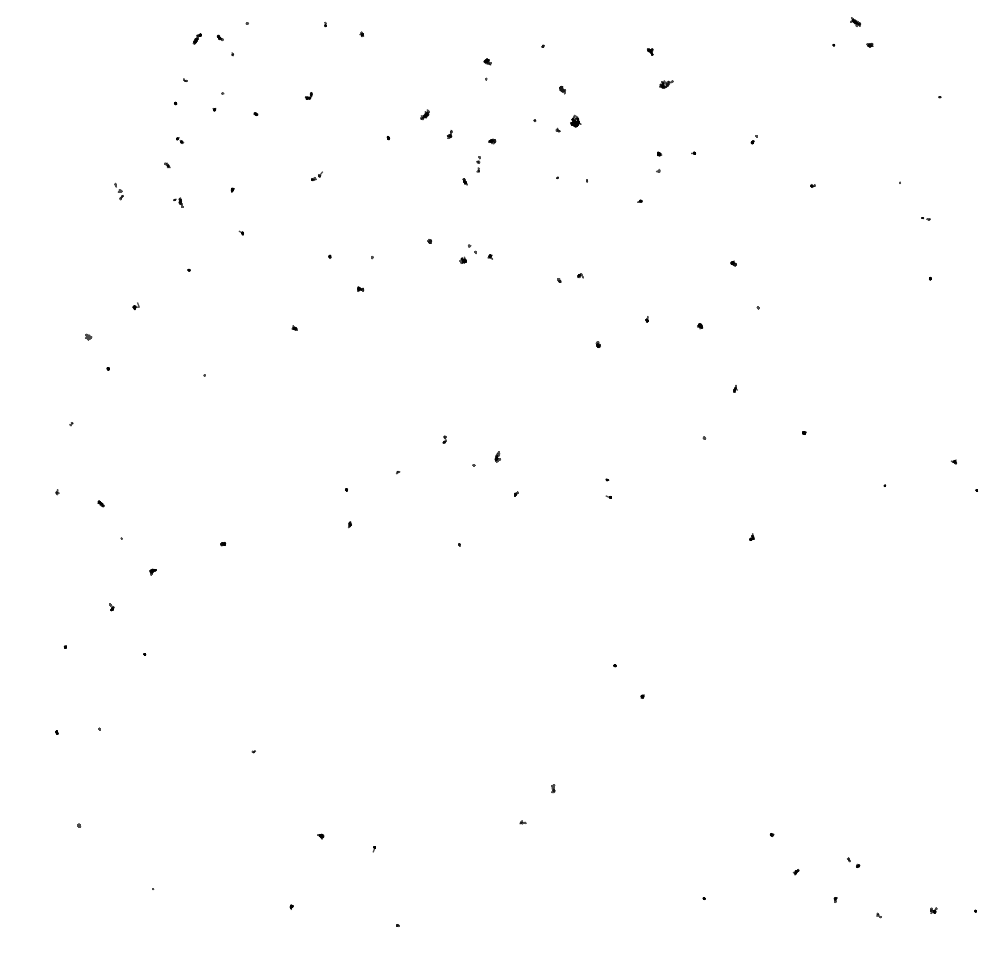

In [45]:
hm.plot_trajectories(prefix, upload=False)

/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/numpy/ma/core.py:827: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)
/Users/mike_mckenna/Downloads/Users/mike_mckenna/Desktop/lib/python3.5/site-packages/numpy/ma/core.py:827: RuntimeWarning: invalid value encountered in less_equal
  return umath.less_equal(x, self.critical_value)


(masked_array(data = [-- -3.2777297217323667 -2.9682312676249816 -2.830092017394446
  -2.7370329984708905 -2.671371817112988 -2.637473164803929
  -2.592901445645463 -2.5537924563141527 -2.529271377737184
  -2.536494229497572 -2.48231093741431 -2.501829759679562
  -2.4908481153472084 -2.494268757756362 -2.5094454580667036
  -2.440439810333189 -2.456550836656986 -2.470363427988202
  -2.5005704569886267 -2.446992205816382 -2.4478665949761425
  -2.4383183810858937 -2.4381856441316967 -2.4331490353069922
  -2.47003404245183 -2.4185746763163545 -2.412115788770469 -2.47402181759693
  -2.4542163488071784 -2.4751421460949388 -2.4079121523696077
  -2.407289606806355 -2.418833269091332 -2.389967940093752
  -2.309729884140687 -2.2662432412940374 -2.2605641851366025
  -2.24170691675386 -2.2043386506929754 -2.170656667269129
  -2.1891161295109383 -2.195350251463489 -2.1281332509615294
  -2.1085469967033514 -2.1294260071265687 -2.1045599054430766
  -2.125657202187083 -2.1341264238466358 -2.1424291511

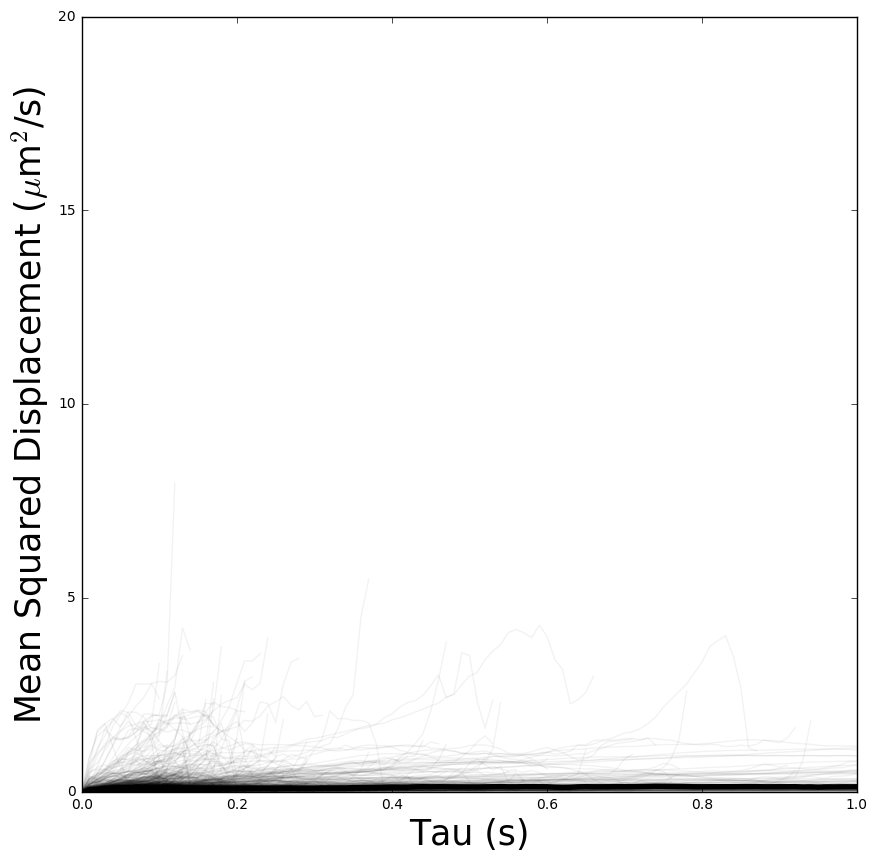

In [49]:
hm.plot_individual_msds(prefix,x_range=40,y_range=5,umppx=0.16,fps=99.93,alpha=0.05,upload=False)

In [ ]:
# features = ('AR', 'D_fit', 'alpha', 'MSD_ratio', 'Track_ID', 'X', 'Y', 'asymmetry1', 'asymmetry2', 'asymmetry3',
#             'boundedness', 'efficiency', 'elongation', 'fractal_dim', 'frames', 'kurtosis', 'straightness', 'trappedness')

# for feature in features:
#     print('10th percentile of {}: {}'.format(feature, merged_ft[feature].quantile(0.1)))
#     print('90th percentile of {}: {}'.format(feature, merged_ft[feature].quantile(0.9)))
    
#     hm.plot_heatmap(prefix, feature=feature, vmin=merged_ft[feature].quantile(0.1), vmax=merged_ft[feature].quantile(0.9))

In [ ]:
# features = ('AR', 'D_fit', 'alpha', 'MSD_ratio', 'Track_ID', 'X', 'Y', 'asymmetry1', 'asymmetry2', 'asymmetry3',
#             'boundedness', 'efficiency', 'elongation', 'fractal_dim', 'frames', 'kurtosis', 'straightness', 'trappedness')
# vmin = (1.36, 0.015, 0.72, -0.09, 0, 0, 0, 0.5, 0.049, 0.089, 0.0069, 0.65, 0.26, 1.28, 0, 1.66, 0.087, -0.225)
# vmax = (3.98, 2.6, 2.3, 0.015, max(merged_ft['Track_ID']), 2048, 2048, 0.99, 0.415, 0.53, 0.062, 3.44, 0.75, 1.79, 650, 3.33, 0.52, -0.208)

# die = {'features': features,
#        'vmin': vmin,
#        'vmax': vmax}
# di = pd.DataFrame(data=die)

In [ ]:
# for i in range(0, di.shape[0]):
#     hm.plot_heatmap(prefix, feature=di['features'][i], vmin=di['vmin'][i], vmax=di['vmax'][i])
#     hm.plot_scatterplot(prefix, feature=di['features'][i], vmin=di['vmin'][i], vmax=di['vmax'][i])

Plotted 60nm_PS_PEG_hippocampus_vid_1_1 heatmap successfully.


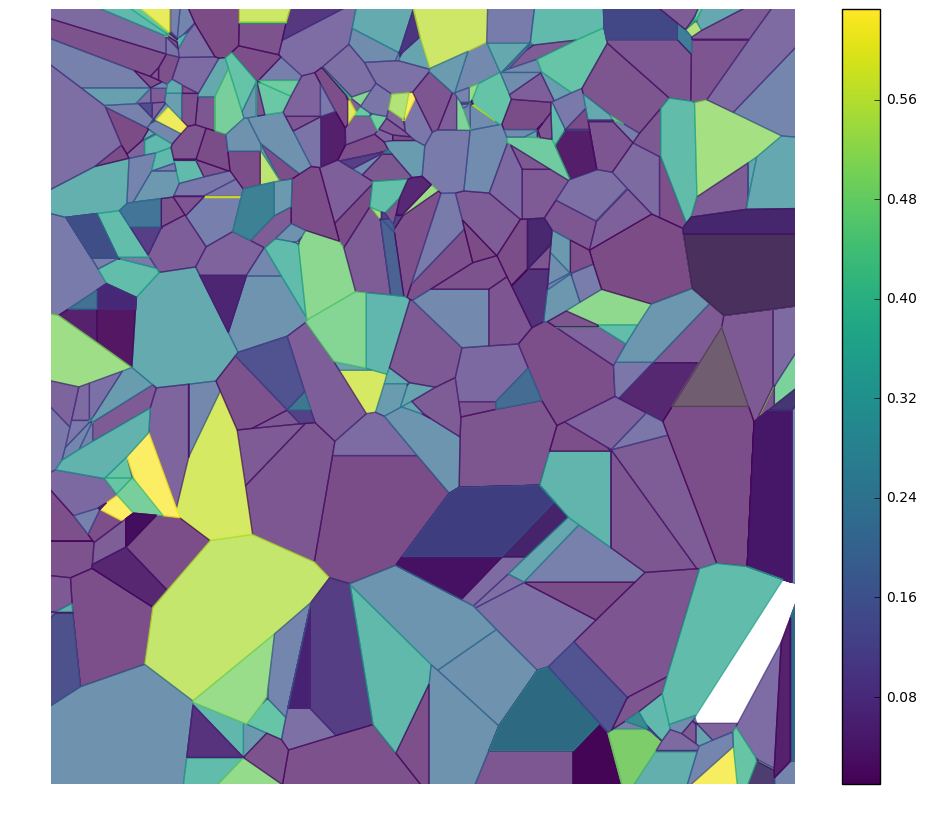

In [53]:
feature = 'efficiency'
hm.plot_heatmap(prefix, feature=feature, vmin=merged_ft[feature].quantile(0.1), vmax=merged_ft[feature].quantile(0.9), upload=False)

In [ ]:
ft.efficiency?

In [ ]:
# fig, ax = plt.subplots(4, 4, figsize=(14, 14))
# for row in range(0, 2):
#     for col in range(0, 4):
#         subimage = sio.imread('{}_{}_{}.tif'.format(prefix, row, col))
#         ax[row, col].imshow(subimage[650, :, :], cmap='gray', vmin=60, vmax=500)
#         ax[row, col].axis('off')

In [ ]:
hm.plot_scatterplot(prefix)

In [ ]:
hm.plot_histogram(prefix)

S3UploadFailedError: Failed to upload in_frame_60_nm_PS_PEG_in_hippocampus_vid_1_2.png to ccurtis7.pup/01_18_Experiment/60/in_frame_60_nm_PS_PEG_in_hippocampus_vid_1_2.png: An error occurred (AccessDenied) when calling the PutObject operation: Access Denied

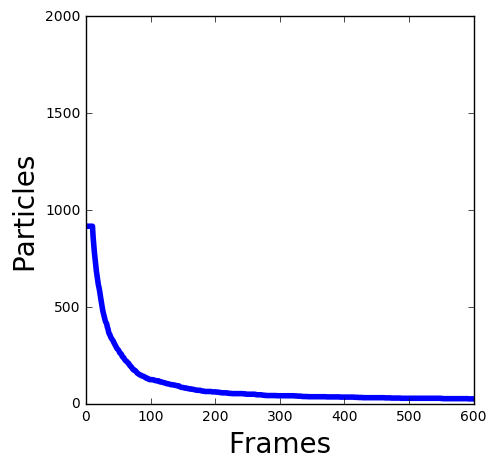

In [31]:
hm.plot_particles_in_frame(prefix)

In [ ]:
gmean1, gSEM1 = hm.plot_individual_msds(prefix, alpha=0.05)